### Problem Statement 
The bank is facing a challenge in retaining its customers, and a significant number of them are leaving the bank (churning). To mitigate this issue, the bank needs to predict which customers are likely to churn based on various factors such as credit score, account balance, demographics, and engagement metrics. The goal is to develop a predictive model that accurately identifies customers at risk of leaving, enabling the bank to implement targeted retention strategies.
### Project Objective 
The project aims to develop a machine learning model to predict customer churn for a bank using factors such as credit score, account balance, and demographics. The goal is to identify at-risk customers and implement targeted retention strategies to reduce churn and improve customer loyalty.
### Domain 
Banking and Financial Services industry.
### Columns
- **RowNumber :** Serial Number
- **CustomerId :** Random values
- **Surname :** Surname of a customer
- **CreditScore :** Credit score of a customer
- **Geography :** Customer's location
- **Gender :** Gender of a customer
- **Age :** Age of a customer
- **Tenure :** Number of years the customer has been a client of the bank
- **Balance :** Account balance of a customer
- **NumOfProducts :** Number of products that a customer has purchased through the bank
- **HasCrCard :** Indicates whether a customer has a credit card
- **IsActiveMember :** Indicates whether a customer is an active member
- **EstimatedSalary :** Estimated salary of a customer
- **Exited :** Indicates whether the customer left the bank

### Importing the libraries

In [88]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from lightgbm  import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\Churn Modeling.csv')
df.shape

(10000, 14)

### Data Exploration

In [3]:
#Extracting first five records.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Extracting last five records.
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
#Printing all column names.
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#Checking for yhe Null values.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00","5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"


### Observations

- "Customerid" and "RowNumber" Columns are not useful in the output prediction.
- The min "CreditScore" value is 350, max is 850.
- There are people with age between 18 to 92.

### Removing "RowNumber", "CustomerId" and "Surname" Columns

In [10]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [11]:
binary_columns = [column for column in df.columns if df[column].nunique() == 2]
print(f"There are {len(binary_columns)} binary class columns in the dataset.\n")
for column in binary_columns:
    print(f"Value counts for {df[column].value_counts()}\n")
    print('*'*50)

print(f"Value counts for {df['Geography'].value_counts()}\n")

There are 4 binary class columns in the dataset.

Value counts for Gender
Male      5457
Female    4543
Name: count, dtype: int64

**************************************************
Value counts for HasCrCard
1    7055
0    2945
Name: count, dtype: int64

**************************************************
Value counts for IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

**************************************************
Value counts for Exited
0    7963
1    2037
Name: count, dtype: int64

**************************************************
Value counts for Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64



### Exploratory Data Analysis

In [12]:
def histplot_boxplot(data, feature, figsize = (6, 4), kde = False):
    fig2, (ax_box, ax_hist) = plt.subplots(
        sharex = True,
        nrows = 2,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize = figsize
        )
    sns.boxplot(data[feature], ax = ax_box, color = 'blue', orient = 'h', showmeans = True)
    sns.histplot(data[feature], ax = ax_hist, color = 'green', kde = True)
    ax_hist.axvline(data[feature].mean(), color = 'green')
    ax_hist.axvline(data[feature].median(), color = 'brown', label = 'median')
    plt.xticks(rotation = 90)
    plt.show()

Distribution of column CreditScore is : 


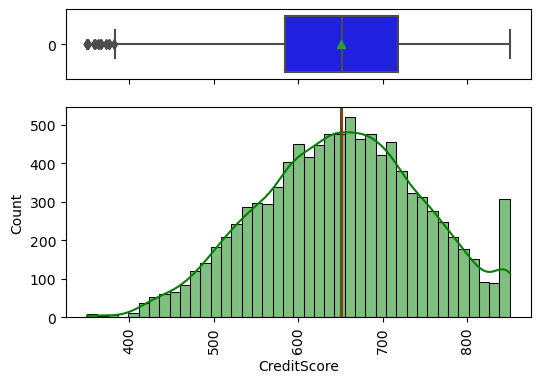

Distribution of column Age is : 


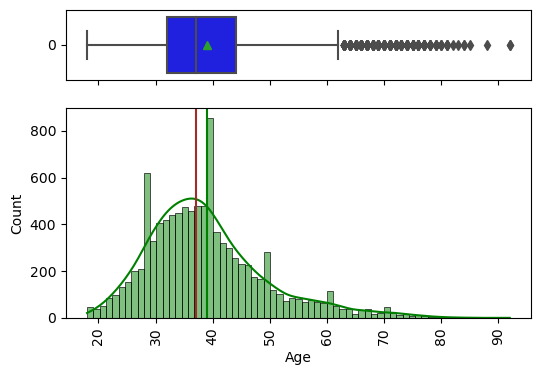

Distribution of column Tenure is : 


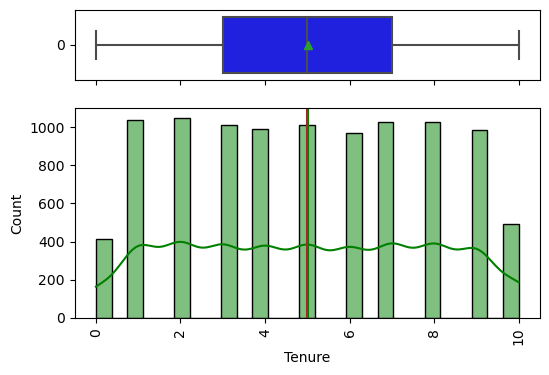

Distribution of column Balance is : 


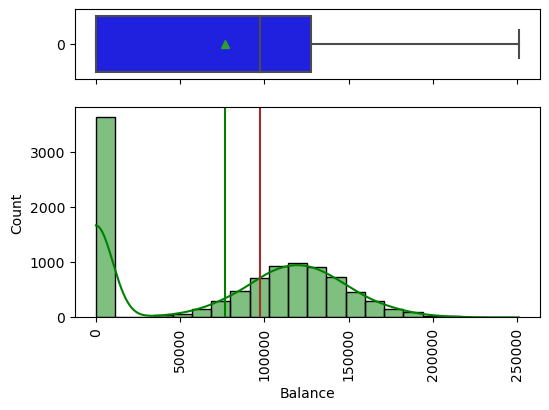

Distribution of column NumOfProducts is : 


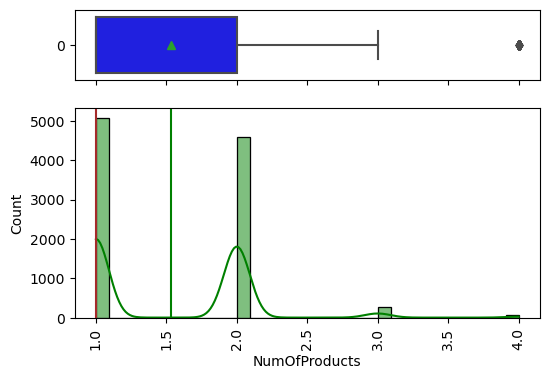

Distribution of column EstimatedSalary is : 


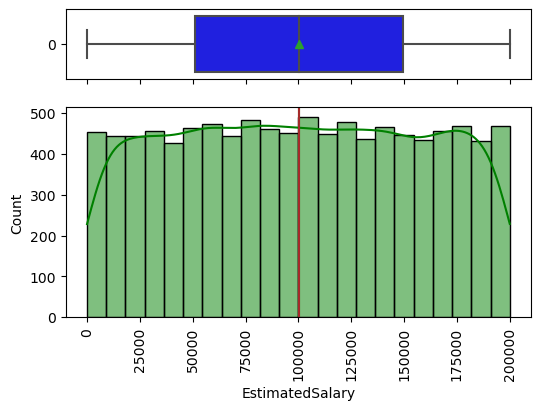

In [13]:
numerical_columns = df.select_dtypes(['float', 'int']).columns
numerical_columns = [column for column in numerical_columns if column not in binary_columns]
for column in numerical_columns:
    print(f"Distribution of column {column} is : ")
    histplot_boxplot(df, column)

### Observations

- The 'CreditScore' column has few outliers.
- 'Age' column is right skewed, there are mainly two significant outliers in this column.
- 'Tenure' and 'EstimatedSalary' columns are following a uniform distribution.
- There is one significant outlier in the 'NumberOfProducts' column.
- There are some records with 'Balance' = 0 and 'EstimatedSalary' = 0.

In [14]:
def labeled_barchart(data, column, bar_width=0.5, n = None):
    plt.figure(figsize = (4,4))    
    ax = sns.countplot(data=data, x=column, palette = 'dark')
    
    for container in ax.containers:
        ax.bar_label(container)
        
    # Adjusting the bar width
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - bar_width
        patch.set_width(bar_width)
        patch.set_x(patch.get_x() + diff * 0.5)

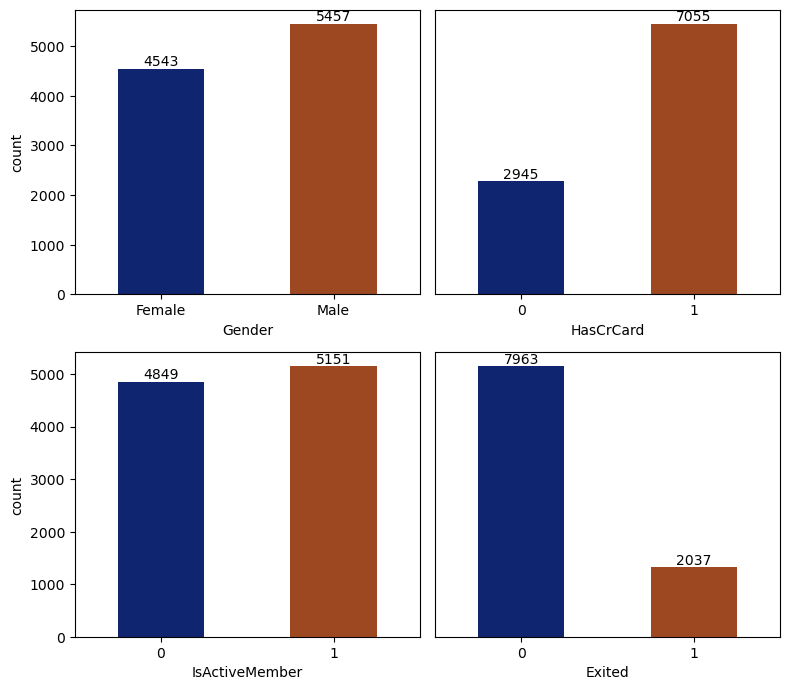

In [15]:
plt.figure(figsize = (8, 7))
for i, column in enumerate(binary_columns):
    plt.subplot(2,2,i+1)   
    ax = sns.countplot(data=df, x=column, palette = 'dark')
    
    bar_width=0.5
    for container in ax.containers:
        ax.bar_label(container)
        
    # Adjusting the bar width
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - bar_width
        patch.set_width(bar_width)
        patch.set_x(patch.get_x() + diff * 0.5)
    if i%2 != 0:
        plt.ylabel('')
        plt.yticks([])
        plt.tight_layout()

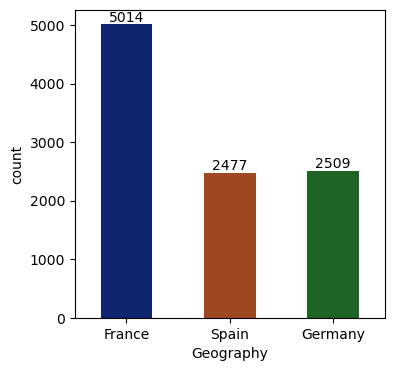

In [16]:
plt.figure(figsize = (4,4)) 
ax = sns.countplot(data=df, x='Geography', palette = 'dark')   
bar_width=0.5
for container in ax.containers:
    ax.bar_label(container)
        
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width
    patch.set_width(bar_width)
    patch.set_x(patch.get_x() + diff * 0.5)

### Observations

- There are 5457 Male customers in the dataset.
- Most of the customers have the Credit Card.
- There are only 2037 records for the customers who exicited the Bank.
- So, we observe that the dataset is imbalanced as it has fewer records for class_"Exited".

### Outliers Treatment

- In 'NumberOfProducts' Column there one significant outlier, every customers has exiced from the bank in these records.
- So, we cannot remove these records from the datset. Let's keep these values for further analysis.

In [17]:
df[df['Balance'] < 1]['Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [18]:
#Replacing 'Balance' with 0.
df['Balance'] = df['Balance'].replace(0, df['Balance'].median())

In [19]:
df[df['Tenure'] == 0]['Exited'].value_counts()

Exited
0    318
1     95
Name: count, dtype: int64

### Outliers treatement in 'Age' column

In [20]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Capping outliers
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,"97,198.54",1,1,1,"101,348.88",1
1,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1,"97,198.54",2,0,0,"93,826.63",0
4,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


### Label Encoding

In [22]:
df['Gender'] = df['Gender'].apply(lambda x : 0 if x == 'Male' else 1)
df['Geography'] = df['Geography'].apply(lambda x : 0 if x == 'France' else (1 if x == 'Spain' else 2))

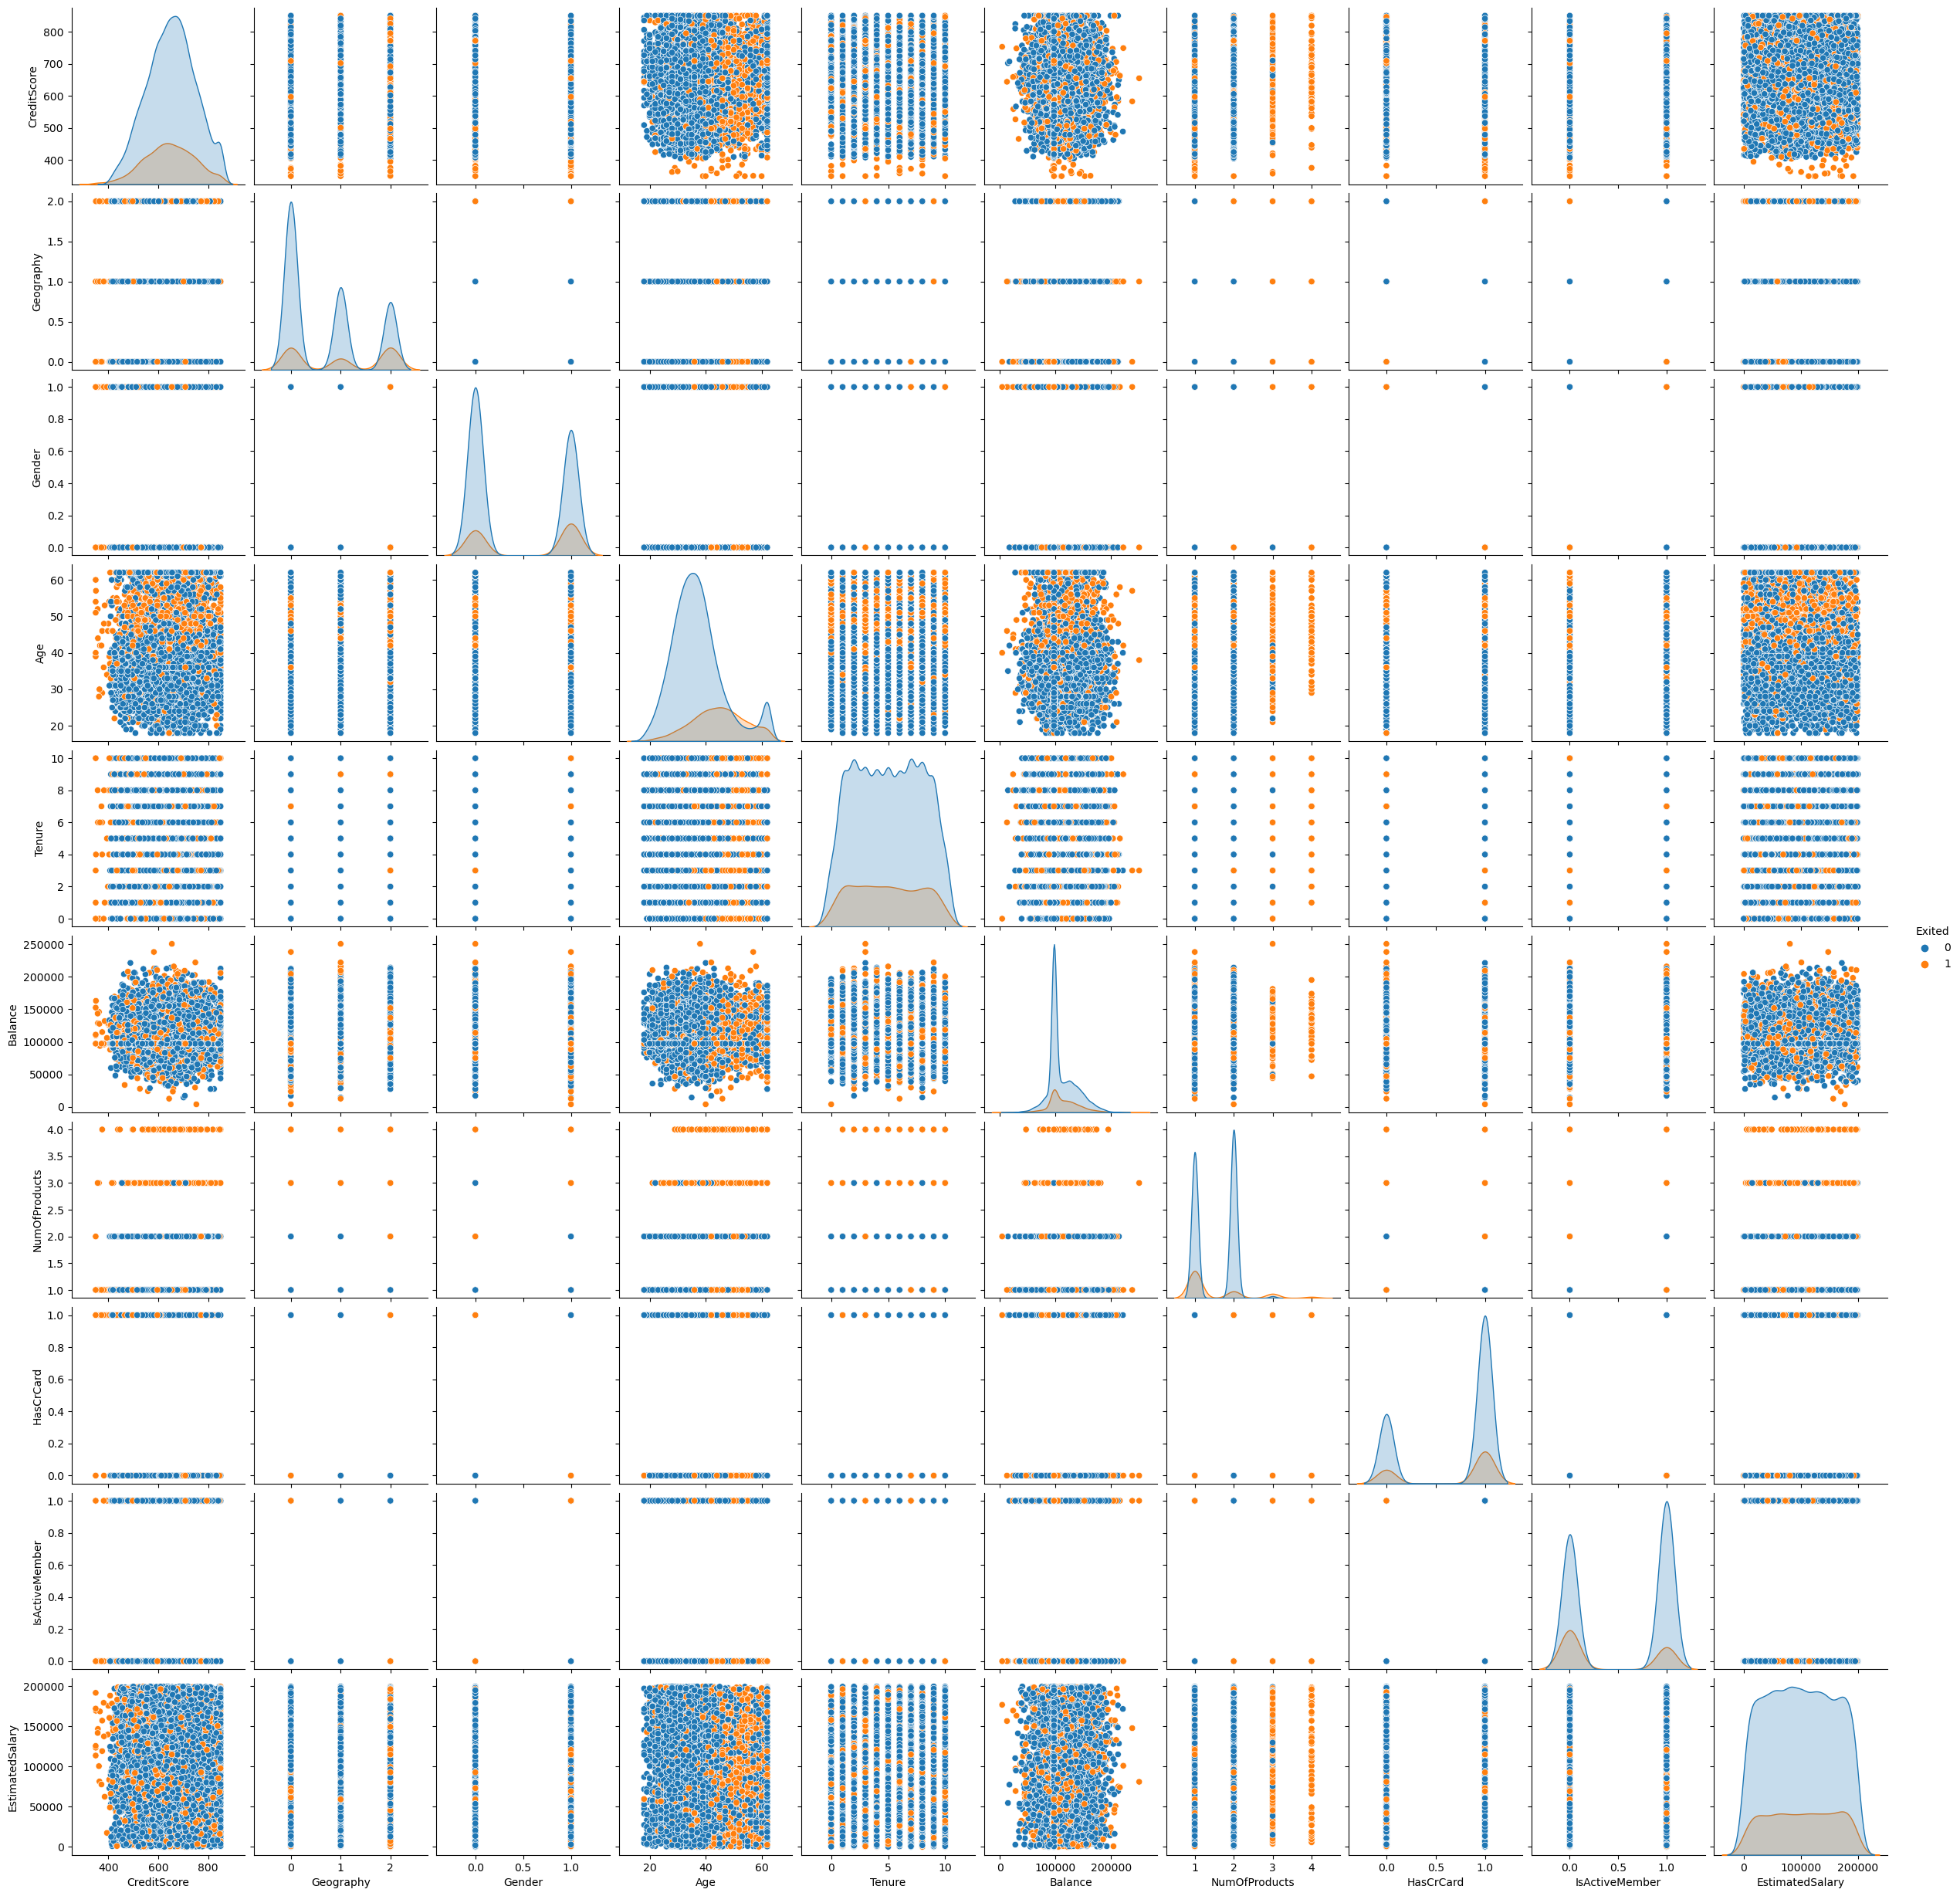

In [23]:
sns.pairplot(df[df.select_dtypes(['float', 'int']).columns], diag_kind='kde', hue='Exited')

### Observations

-  If age > 40, then the person is likely to leave the bank from the pairplot.
- The customers are likely to exit the bank if the NumberOfProducts value is high.

<Axes: >

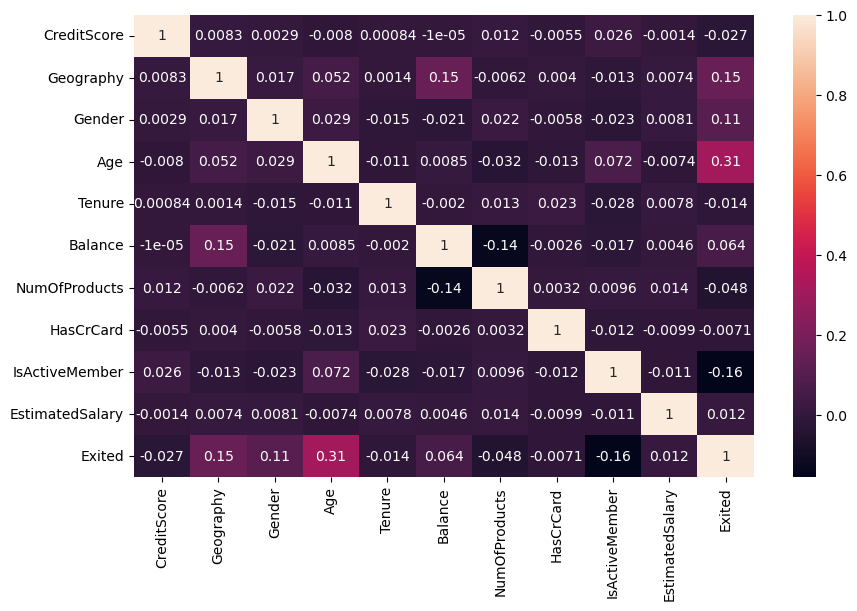

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(df[df.select_dtypes(['float', 'int']).columns].corr(), annot = True)

### Observations

- Age is positevely correlated with the target column(0.31%).
- NumOfPrioducts and Balance columns are negatively correlated.
- Balance and Geography columns are positevely correalted.
- From the heatmap, we observe that there is no significant correlation between independent variables.

### Data Splitting

In [25]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = True, stratify = y )
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_train : {X_test.shape}")

Shape of X_train : (8000, 10)
Shape of X_train : (2000, 10)


In [27]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [28]:
y_test.value_counts()

Exited
0    1593
1     407
Name: count, dtype: int64

- There is class imbalnce in both train and test sets.
- Let's balance the class counts using over_sampling techniques(SMOTE).

### Class Balancing

In [29]:
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(f"Shape of X_train_balanced : {X_train_balanced.shape}\n")
print(f"Value counts after balacing\n{y_train_balanced.value_counts()}")

Shape of X_train_balanced : (12740, 10)

Value counts after balacing
Exited
0    6370
1    6370
Name: count, dtype: int64


- Now the data is balanced.

### Scaling the data

In [30]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train_balanced)
test_scaled = scaler.transform(X_test)

### Model Building

In [31]:
from sklearn.metrics import *
#Function to print classification metrics.
def print_metrics(actual, predicted):
    Accuracy = accuracy_score(actual, predicted)
    Precision = precision_score(actual, predicted)
    Recall = recall_score(actual, predicted)
    F1_score = f1_score(actual, predicted)
    AUC = roc_auc_score(actual, predicted)
    return Accuracy, Precision, Recall, F1_score, AUC


#Extracting the scores.
def model_scores(scores):
    labels_ = ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC']
    for label, score in zip(labels_, scores):
        print(f"{label} : {score}")

#Function for confusion matrix plotting.
def confusion_matrix_(actual_train, predicted_train,actual_test, predicted_test):
    cm_1 = confusion_matrix(actual_train, predicted_train)
    cm_1 = pd.DataFrame(cm_1, index = ["Actual_0", "Actual_1"], columns = ['Pred_0', "Pred_1"])
    cm_2 = confusion_matrix(actual_test, predicted_test)
    cm_2 = pd.DataFrame(cm_2, index = ["Actual_0", "Actual_1"], columns = ['Pred_0', "Pred_1"])
    plt.figure(figsize = (5,3))
    plt.subplot(121)
    sns.heatmap(cm_1, annot = True, cbar = False, fmt = 'd', cmap='Blues')
    plt.title("Training")
    plt.subplot(122)
    sns.heatmap(cm_2, annot = True, cbar = False, fmt = 'd', cmap='Blues')
    plt.yticks([])  
    plt.title("Testing")
    plt.tight_layout()

#Function for AUC_ROC_CUVE plotting.
def roc_plot(actual, predicted):
    fpr, tpr, thresholds = roc_curve(actual, predicted)
    plt.figure(figsize = (5,3))
    plt.plot(fpr, tpr, color = 'b')
    plt.title("AUC_ROC_CURVE")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [32]:
#Model Building and scores printing.
def model_training(model, X_train, y_train, X_test, y_test, validation = False):
    model = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    #Priniting the metrics.
    print("Training data scores\n ")
    scores =  print_metrics(y_train, y_pred_train)
    model_scores(scores)
    print('*'*50)
    print("Testing data scores \n ")
    scores =  print_metrics(y_test, y_pred_test)
    model_scores(scores)
    confusion_matrix_(y_train, y_pred_train, y_test, y_pred_test)
    roc_plot(y_test, y_pred_test)
    return model
    
#Model Tuning   
def grid_searchCV(X_train, y_train, X_test, y_test,  estimator, param_grid, cv = 5, random_state = 42):
    grid_search = GridSearchCV(estimator = estimator, scoring = 'f1', param_grid = param_grid, cv = cv)
    grid_search.fit(X_train, y_train)
    print(f"Best_parameters are : {grid_search.best_params_}")
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    #Priniting the metric.
    print("Training data scores\n ")
    scores =  print_metrics(y_train_balanced, y_pred_train)
    model_scores(scores)
    print('*'*50)
    print("Testing data scores \n ")
    scores =  print_metrics(y_test, y_pred_test)
    model_scores(scores)
    confusion_matrix_(y_train, y_pred_train,y_test, y_pred_test)
    return grid_search
    
    
def random_searchCV(X_train, y_train, X_test, y_test,  estimator, param_grid, n_iter = 10, cv = 5, random_state = 42):
    random_search = RandomizedSearchCV(estimator = estimator, scoring = 'f1', param_distributions = param_grid, n_iter = n_iter,cv = cv)
    random_search.fit(X_train, y_train)
    y_pred_train = random_search.predict(X_train)
    y_pred_test = random_search.predict(X_test)
    #Priniting the metric.
    print("Training data scores\n ")
    scores =  print_metrics(y_train_balanced, y_pred_train)
    model_scores(scores)
    print('*'*50)
    print("Testing data scores \n ")
    scores =  print_metrics(y_test, y_pred_test)
    model_scores(scores)
    confusion_matrix_(y_train, y_pred_train,y_test, y_pred_test)
    return random_search
    
    
def scores_container(name, scores):
    df = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC'])
    df[name] = scores
    return df

def validation_scores(model, X, y):
    y_pred = model.predict(X)
    scores = print_metrics(y, y_pred)
    print('*'*50)
    print(f"Validation Scores are  \n ")
    model_scores(scores)

Training data scores
 
Accuracy : 0.7398744113029827
Precision : 0.7320777642770352
Recall : 0.7566718995290423
F1_score : 0.7441716844218003
AUC : 0.7398744113029827
**************************************************
Testing data scores 
 
Accuracy : 0.707
Precision : 0.36818851251840945
Recall : 0.6142506142506142
F1_score : 0.4604051565377532
AUC : 0.6724737063720114


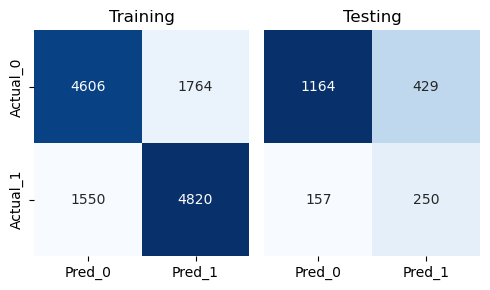

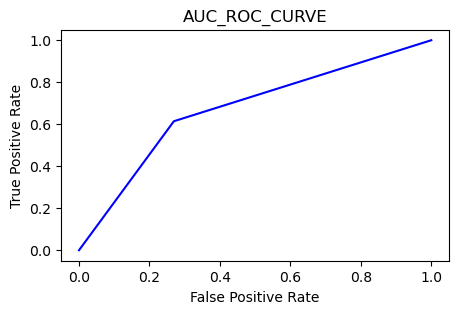

In [37]:
#Initializing the LogisticRegression model.
lr = LogisticRegression(random_state = 42)
lr_model  = model_training(lr, train_scaled, y_train_balanced, test_scaled, y_test)

### KNN Model

Training data scores
 
Accuracy : 0.8642857142857143
Precision : 0.8475363187060057
Recall : 0.8883830455259026
F1_score : 0.8674791139725607
AUC : 0.8642857142857143
**************************************************
Testing data scores 
 
Accuracy : 0.739
Precision : 0.4124809741248097
Recall : 0.6658476658476659
F1_score : 0.5093984962406015
AUC : 0.7117687795653896


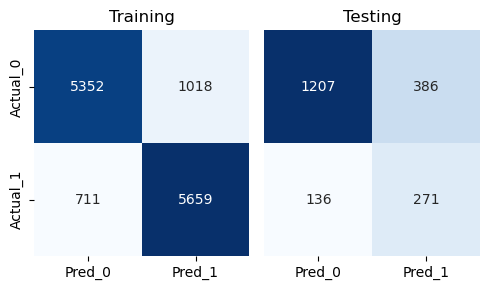

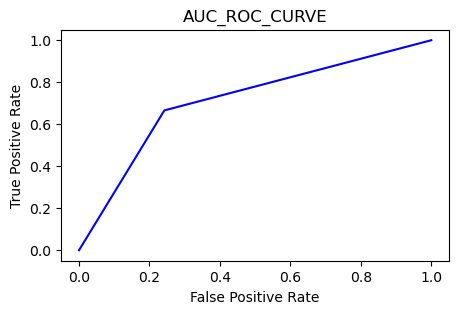

In [39]:
knn = KNeighborsClassifier()
knn_model = model_training(knn, train_scaled, y_train_balanced, test_scaled, y_test)

Best_parameters are : {'n_neighbors': 7, 'p': 1}
Training data scores
 
Accuracy : 0.8587912087912087
Precision : 0.8411703239289446
Recall : 0.8846153846153846
F1_score : 0.8623460096411355
AUC : 0.8587912087912087
**************************************************
Testing data scores 
 
Accuracy : 0.75
Precision : 0.42745709828393136
Recall : 0.6732186732186732
F1_score : 0.5229007633587787
AUC : 0.7214178739602468


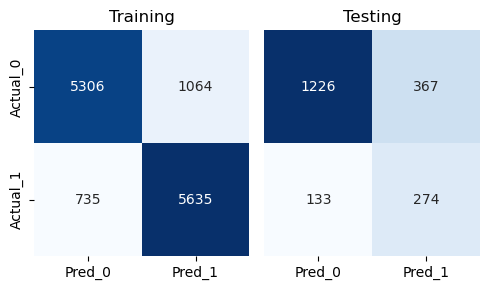

In [40]:
knn_param_grid = {
     'n_neighbors': range(5, 20, 2),
     'p' : [1,2]
}

knn_tuned = grid_searchCV(train_scaled, y_train_balanced, test_scaled, y_test, KNeighborsClassifier(), knn_param_grid)

Training data scores
 
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1_score : 1.0
AUC : 1.0
**************************************************
Testing data scores 
 
Accuracy : 0.73
Precision : 0.38898163606010017
Recall : 0.5724815724815725
F1_score : 0.46322067594433397
AUC : 0.6713631967869257


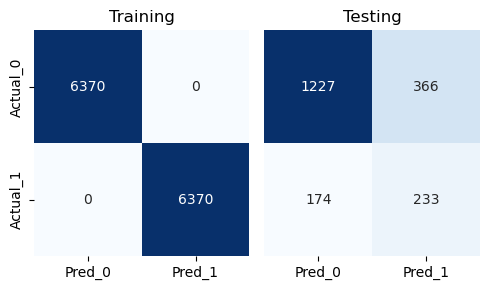

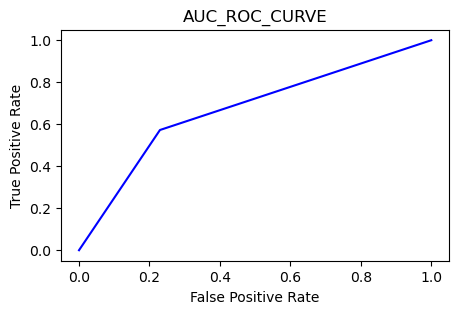

In [45]:
tree = DecisionTreeClassifier()
tree_model = model_training(tree, train_scaled, y_train_balanced, test_scaled, y_test)

In [57]:
for col, value in zip(X_train_balanced, tree_model.feature_importances_):
    print(f"{col} : {value}")

CreditScore : 0.12129067025237829
Geography : 0.031604328428713344
Gender : 0.013045938601688662
Age : 0.24343467331117621
Tenure : 0.06320707939444778
Balance : 0.14042927602420185
NumOfProducts : 0.09737703109103453
HasCrCard : 0.018165942117674912
IsActiveMember : 0.11808241050380874
EstimatedSalary : 0.15336265027487567


Best_parameters are : {'class_weight': {0: 40, 1: 60}, 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 100}
Training data scores
 
Accuracy : 0.7599686028257456
Precision : 0.7221625972632144
Recall : 0.845054945054945
F1_score : 0.7787905092592593
AUC : 0.7599686028257457
**************************************************
Testing data scores 
 
Accuracy : 0.6745
Precision : 0.3547619047619048
Recall : 0.7321867321867321
F1_score : 0.47794707297514033
AUC : 0.695974094279179


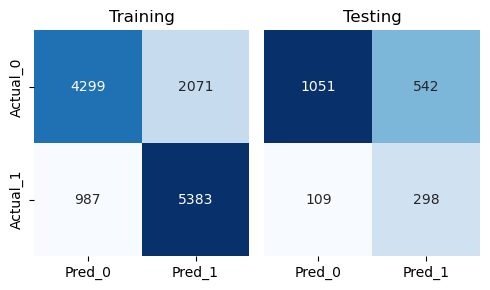

In [46]:
tree_param_grid = {
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf':[50,100,200],
    'max_features' : [0.2, 0.3, 0.5],
    'class_weight' : [{0:40, 1:60}]
}
model = grid_searchCV(train_scaled, y_train_balanced, test_scaled, y_test, DecisionTreeClassifier(), tree_param_grid)

Training data scores
 
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1_score : 1.0
AUC : 1.0
**************************************************
Testing data scores 
 
Accuracy : 0.791
Precision : 0.48902195608782434
Recall : 0.601965601965602
F1_score : 0.539647577092511
AUC : 0.7206312630041445


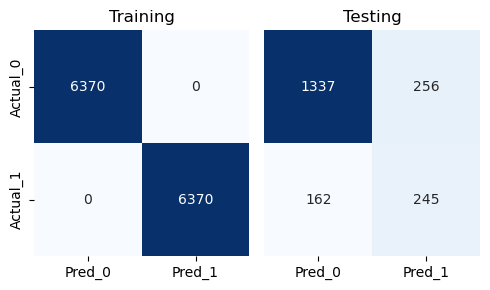

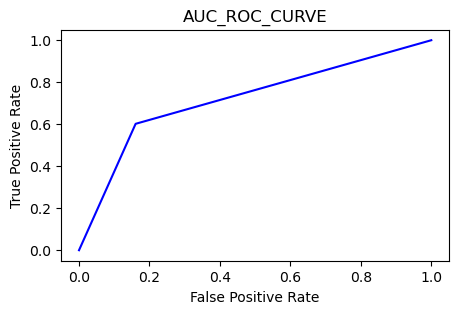

In [58]:
forest = RandomForestClassifier(n_estimators = 500)
forest_model = model_training(forest, train_scaled, y_train_balanced, test_scaled, y_test)

Best_parameters are : {'max_depth': 5, 'min_samples_split': 200, 'n_estimators': 100}
Training data scores
 
Accuracy : 0.8015698587127159
Precision : 0.8019490726186733
Recall : 0.8009419152276295
F1_score : 0.8014451775054979
AUC : 0.8015698587127159
**************************************************
Testing data scores 
 
Accuracy : 0.7745
Precision : 0.46296296296296297
Recall : 0.6756756756756757
F1_score : 0.5494505494505495
AUC : 0.7377122885597462


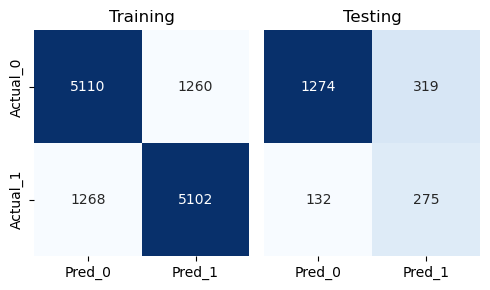

In [60]:
forest_param_grid = {
    'n_estimators' : [100, 150, 300, 500], 
    'max_depth' : [2,3,4,5],
    'min_samples_split' :[100,200,500]
}
model = grid_searchCV(train_scaled, y_train_balanced, test_scaled, y_test, RandomForestClassifier(), forest_param_grid)

Training data scores
 
Accuracy : 0.8175824175824176
Precision : 0.8153054862842892
Recall : 0.8211930926216641
F1_score : 0.8182386985765682
AUC : 0.8175824175824177
**************************************************
Testing data scores 
 
Accuracy : 0.7695
Precision : 0.45514950166112955
Recall : 0.6732186732186732
F1_score : 0.5431119920713577
AUC : 0.7336589285741827


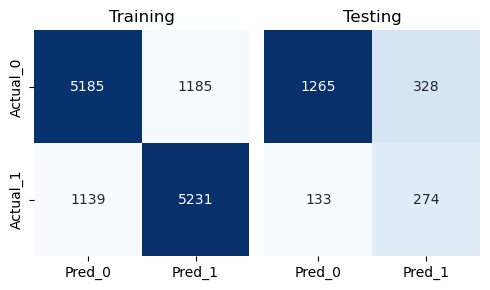

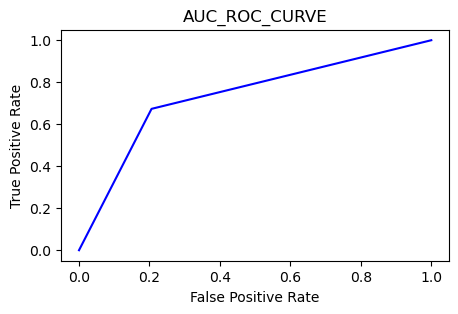

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators = 2000)
ada_model = model_training(ada_boost, train_scaled, y_train_balanced, test_scaled, y_test)

Best_parameters are : {'learning_rate': 0.1, 'n_estimators': 1500}
Training data scores
 
Accuracy : 0.8635792778649921
Precision : 0.8676190476190476
Recall : 0.8580847723704866
F1_score : 0.8628255722178374
AUC : 0.8635792778649921
**************************************************
Testing data scores 
 
Accuracy : 0.7865
Precision : 0.48154981549815495
Recall : 0.6412776412776413
F1_score : 0.5500526870389885
AUC : 0.7324404527794358


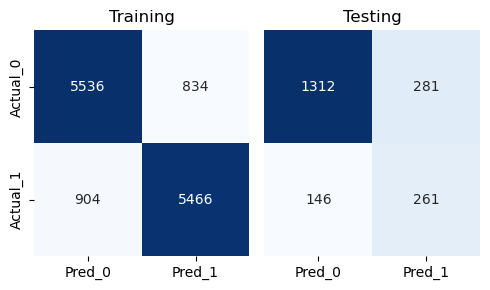

In [63]:
ada_param_grid = {
    'n_estimators': [1000, 1500],
    'learning_rate' : [0.001, 0.01, 0.1]
    }
ada_tuned = grid_searchCV(train_scaled, y_train_balanced, test_scaled, y_test, AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth = 2)), ada_param_grid)

Training data scores
 
Accuracy : 0.8281789638932496
Precision : 0.8354999197560584
Recall : 0.8172684458398745
F1_score : 0.8262836282834696
AUC : 0.8281789638932496
**************************************************
Testing data scores 
 
Accuracy : 0.789
Precision : 0.4865350089766607
Recall : 0.6658476658476659
F1_score : 0.5622406639004149
AUC : 0.7431560990883024


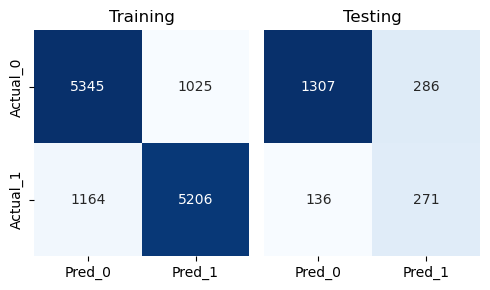

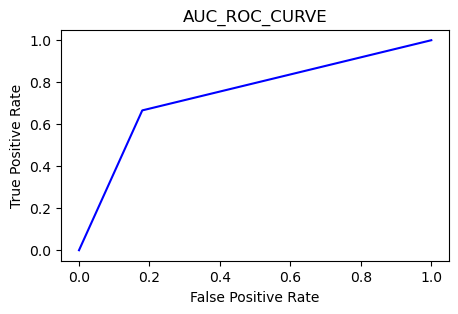

In [64]:
svm = SVC()
model = model_training(svm, train_scaled, y_train_balanced, test_scaled, y_test)

Best_parameters are : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Training data scores
 
Accuracy : 0.8281789638932496
Precision : 0.8354999197560584
Recall : 0.8172684458398745
F1_score : 0.8262836282834696
AUC : 0.8281789638932496
**************************************************
Testing data scores 
 
Accuracy : 0.789
Precision : 0.4865350089766607
Recall : 0.6658476658476659
F1_score : 0.5622406639004149
AUC : 0.7431560990883024


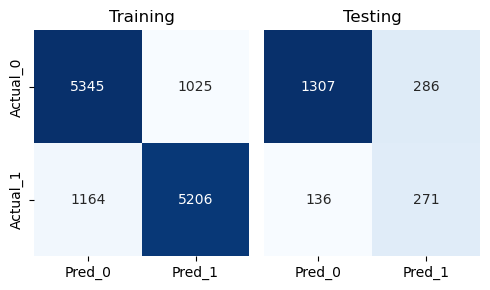

In [65]:
svm_param_grid = {
    'kernel' : ['rbf', 'sigmoid'],
    'C' : [0.01, 0.1, 1],
    'gamma' : [0.01, 0.1, 1],
}
svm_tuned = grid_searchCV(train_scaled, y_train_balanced, test_scaled, y_test, SVC(random_state = 42), svm_param_grid)

Training data scores
 
Accuracy : 0.7645996860282575
Precision : 0.7593475919372211
Recall : 0.7747252747252747
F1_score : 0.7669593597016086
AUC : 0.7645996860282573
**************************************************
Testing data scores 
 
Accuracy : 0.7365
Precision : 0.40476190476190477
Recall : 0.6265356265356266
F1_score : 0.4918032786885246
AUC : 0.6955653650568905


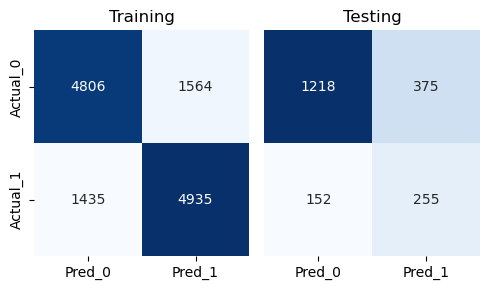

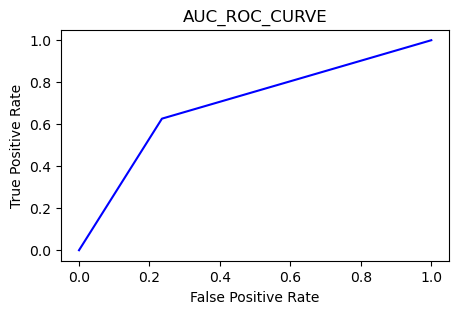

In [45]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
model = model_training(naive_bayes, train_scaled, y_train_balanced, test_scaled, y_test)

Training data scores
 
Accuracy : 0.8993720565149137
Precision : 0.9002517306482064
Recall : 0.8982731554160126
F1_score : 0.8992613547068993
AUC : 0.8993720565149138
**************************************************
Testing data scores 
 
Accuracy : 0.786
Precision : 0.48044692737430167
Recall : 0.6339066339066339
F1_score : 0.5466101694915254
AUC : 0.7293826954843904


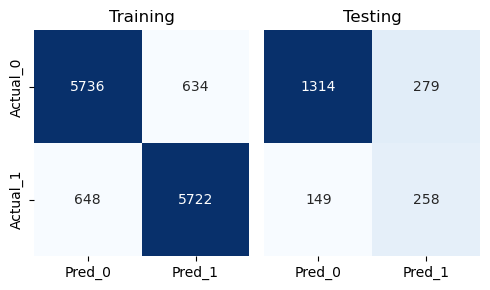

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_param_grid = {
    'n_estimators': [1000], 
    'learning_rate' : [0.001, 0.01, 0.1, 1]
    }
gradient_boosting = GradientBoostingClassifier(random_state = 42)
model = random_searchCV(train_scaled, y_train_balanced, test_scaled, y_test, gradient_boosting, gradient_param_grid)

0:	learn: 0.4705581	total: 4.36ms	remaining: 4.35s
100:	learn: 0.3343614	total: 223ms	remaining: 1.99s
200:	learn: 0.3305101	total: 418ms	remaining: 1.66s
300:	learn: 0.3280309	total: 614ms	remaining: 1.43s
400:	learn: 0.3261052	total: 809ms	remaining: 1.21s
500:	learn: 0.3246590	total: 1s	remaining: 1s
600:	learn: 0.3234078	total: 1.2s	remaining: 795ms
700:	learn: 0.3222735	total: 1.39s	remaining: 592ms
800:	learn: 0.3212539	total: 1.58s	remaining: 393ms
900:	learn: 0.3203496	total: 1.77s	remaining: 195ms
999:	learn: 0.3195379	total: 1.96s	remaining: 0us
Training data scores
 
Accuracy : 0.8682857142857143
Precision : 0.7630480167014614
Recall : 0.5126227208976157
F1_score : 0.613255033557047
AUC : 0.7359489636063249
**************************************************
Testing data scores 
 
Accuracy : 0.8483333333333334
Precision : 0.6989795918367347
Recall : 0.44844517184942717
F1_score : 0.5463609172482552
AUC : 0.6995260601817248


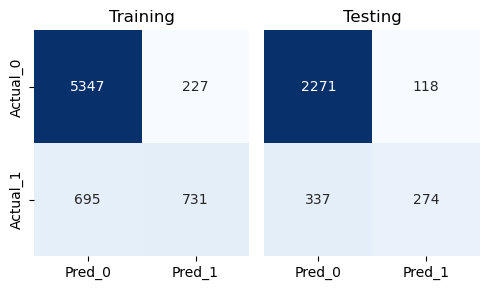

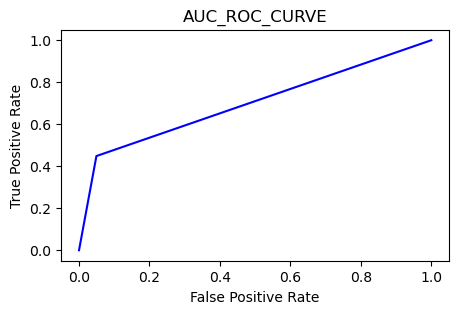

In [88]:
# Initialize the CatBoostClassifier
cat_model = CatBoostClassifier(random_state = 42,
                           iterations=1000, 
                           learning_rate=1, 
                           depth=3, 
                           loss_function='Logloss', 
                           verbose=100)
cat_model = model_training(cat_model, train_scaled, y_train_balanced, test_scaled, y_test)

Best_parameters are : {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1}
Training data scores
 
Accuracy : 0.8530612244897959
Precision : 0.8561925878999049
Recall : 0.8486656200941916
F1_score : 0.8524124881740776
AUC : 0.8530612244897959
**************************************************
Testing data scores 
 
Accuracy : 0.794
Precision : 0.49530956848030017
Recall : 0.6486486486486487
F1_score : 0.5617021276595745
AUC : 0.7398924348076892


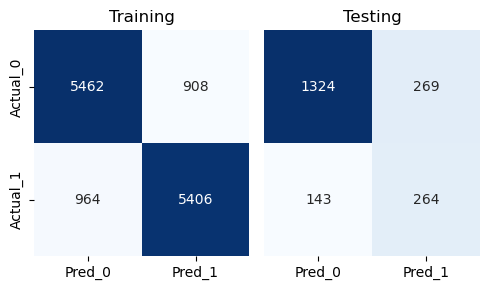

In [55]:
import xgboost as xgb

xgboost_classifier = xgb.XGBClassifier(random_state = 42, use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2,3],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

model = grid_searchCV(train_scaled, y_train_balanced, test_scaled, y_test, xgboost_classifier, xgb_param_grid)

Best_parameters are : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Training data scores
 
Accuracy : 0.8281789638932496
Precision : 0.8354999197560584
Recall : 0.8172684458398745
F1_score : 0.8262836282834696
AUC : 0.8281789638932496
**************************************************
Testing data scores 
 
Accuracy : 0.789
Precision : 0.4865350089766607
Recall : 0.6658476658476659
F1_score : 0.5622406639004149
AUC : 0.7431560990883024


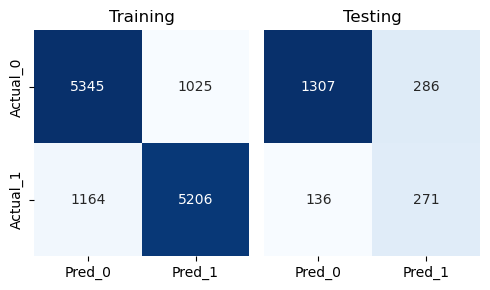

In [66]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2'
}
model = grid_searchCV(train_scaled, y_train_balanced, test_scaled, y_test, LogisticRegression(), param_grid)

### Creating a DataFrame to print all the models metrics and compare.

In [87]:
def scores_container(model_name, scores):
    return pd.DataFrame({model_name: scores}, index=['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC'])

scores_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC'])
models_scores = [
    ('LogisticR', [0.71, 0.39, 0.62, 0.46, 0.67]),
    ('KNN', [0.74, 0.41, 0.66, 0.51, 0.71]),
    ('KNN_Tuned', [0.75, 0.43, 0.67, 0.52, 0.72]),
    ('DecisionTree', [0.73, 0.39, 0.57, 0.46, 0.67]),
    ('Tuned_Tree', [0.67, 0.35, 0.73, 0.48, 0.70]),
    ('RandomForest', [0.80, 0.49, 0.60, 0.54, 0.70]),
    ('Tuned_Forest', [0.77, 0.46, 0.66, 0.55, 0.74]),
    ('SVC', [0.79, 0.49, 0.67, 0.56, 0.74]),
    ('AdaBoost', [0.79, 0.48, 0.64, 0.55, 0.73]),
    ('GaussianNB', [0.74, 0.40, 0.63, 0.50, 0.70]),
    ('CatBoost', [0.85, 0.70, 0.45, 0.55, 0.70]),
    ('LogisticR_Tuned', [0.79, 0.49, 0.67, 0.56, 0.74]),
    ('XGB', [0.80, 0.50, 0.65, 0.56, 0.74])
]
for model, scores in models_scores:
    scores_df = pd.concat([scores_df, scores_container(model, scores)], axis=1)
scores_df.T

,Accuracy,Precision,Recall,F1_score,AUC
LogisticR,0.71,0.39,0.62,0.46,0.67
KNN,0.74,0.41,0.66,0.51,0.71
KNN_Tuned,0.75,0.43,0.67,0.52,0.72
DecisionTree,0.73,0.39,0.57,0.46,0.67
Tuned_Tree,0.67,0.35,0.73,0.48,0.70
RandomForest,0.80,0.49,0.60,0.54,0.70
Tuned_Forest,0.77,0.46,0.66,0.55,0.74
SVC,0.79,0.49,0.67,0.56,0.74
AdaBoost,0.79,0.48,0.64,0.55,0.73
GaussianNB,0.74,0.40,0.63,0.50,0.70


### Observations

- The dataset is very imbalanced as it contains the ratio's in the output variable are {0:>70%, 1:<20%}.
- There are two numerical columns which are following a normal distriburtion.
- There are some records with zero(0) for "Estimated Salary" and "Balance" columns.
- From the heatmap there is no significant relationship between dependent variable and any other independent variales.
- There are significant outliers in "Age" Column and clipped those outliers for model building.

**Low Performing models:** 
- (i) Base Random forest and Decision tree models are very overfitting.
- (ii) Base KNN classifier is giving comparatively very low scores in testing set. 

**Best Performed models:**

- (i) Most of the models are  giving low scores in terms of Recall, Prescision and F1_score.since it is a classification problem, we cannot take accuracy as a performance metric.
- (ii) XGB model is giving comparatively good scores than the other models.
- (iii) This model is not overfitting.
- (v) So, the best performer among all the models is "CatBoost"
[Accuracy = 0.80, Precision = 0.50, Recall = 0.65, F1_score = 0.56, AUC_roc_Score = 0.74.]